In [1]:
#使用Naive Bayes模型完成情感分析
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'Tweets.csv')

In [3]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data[['text','airline_sentiment']]

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [5]:
label_to_index = {"negative": 0,
                  "neutral": 1,
                  "positive": 2}

In [6]:
## 去除開頭航空名稱 ex. @VirginAmerica
X = data['text'].apply(lambda x: ' '.join(x.split(' ')[1:])).values
## 將negative, neutral, postive 轉換為 0,1,2
Y = data['airline_sentiment'].apply(lambda x: label_to_index[x]).values

In [7]:
#文字預處理
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

## 創建Lemmatizer
lemmatizer = WordNetLemmatizer() 
def get_wordnet_pos(word):
    """將pos_tag結果mapping到lemmatizer中pos的格式"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
def clean_content(X):
    # remove non-alphabet characters
    X_clean = [re.sub('[^a-zA-Z]',' ', str(x)).lower() for x in X]
    # tokenize
    X_word_tokenize = [nltk.word_tokenize(x) for x in X_clean]
    # stopwords_lemmatizer
    X_stopwords_lemmatizer = []
    stop_words = set(stopwords.words('english'))
    for content in X_word_tokenize:
        content_clean = []
        for word in content:
            if word not in stop_words:
                word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
                content_clean.append(word)
        X_stopwords_lemmatizer.append(content_clean)
    
    X_output = [' '.join(x) for x in X_stopwords_lemmatizer]
    
    return X_output

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabienne2.Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
X = clean_content(X)

In [42]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
#max_features是要建造幾個column，會按造字出現的頻率高低去篩選
cv=CountVectorizer(max_features = 3600)
X_T=cv.fit_transform(X).toarray()

In [43]:
# 有 14640 個樣本，每個樣本用3600維表示
X_T.shape 

(14640, 3600)

In [44]:
#將資料拆成 train/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_T, Y, test_size = 0.2)

In [16]:
#畫出 Confusion Matrix 結果
import numpy as np
from sklearn.metrics import confusion_matrix
def plot_cm_output(cm, labels=['negative', 'neutral', 'positive']):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues,)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [17]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
clf_M = MultinomialNB()
clf_M.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
#測試 train/testset的 Accuracy

#MultinomialNB

print('Trainset Accuracy: {}'.format(clf_M.score(X_train, y_train)))

Trainset Accuracy: 0.8235143442622951


In [47]:
print('Testset Accuracy: {}'.format(clf_M.score(X_test, y_test)))

Testset Accuracy: 0.7687841530054644


In [48]:
output_ = clf_M.predict(X_test)
cm_output = confusion_matrix(y_test, output_)

In [49]:
cm_output

array([[1614,  124,   65],
       [ 266,  321,   58],
       [ 108,   56,  316]], dtype=int64)

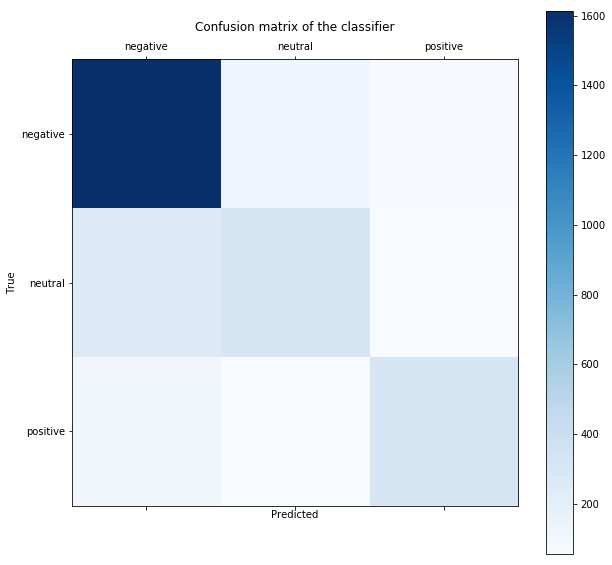

In [50]:
plot_cm_output(cm_output)

In [51]:
#BernoulliNB
#將BOW的標注轉換為『文字是否出現在段落內』，以符合BernoulliNB的假設(所有特徵皆為二元)

X_train[X_train>1]=1
X_test[X_test>1]=1

In [52]:
clf_B = BernoulliNB()
clf_B.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [53]:
print('Trainset Accuracy: {}'.format(clf_B.score(X_train, y_train)))

Trainset Accuracy: 0.8313695355191257


In [54]:
print('Testset Accuracy: {}'.format(clf_B.score(X_test, y_test)))

Testset Accuracy: 0.7790300546448088


In [55]:
output_ = clf_B.predict(X_test)
cm_output = confusion_matrix(y_test, output_)

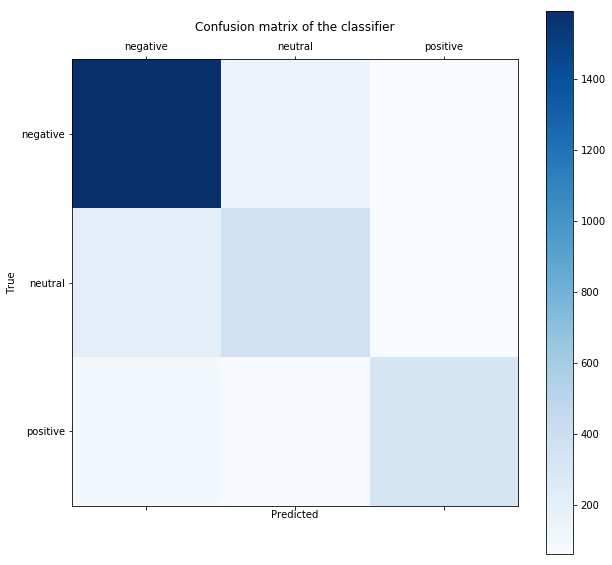

In [56]:
plot_cm_output(cm_output)